In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Pandas Series

###### A series is a one-dimensional array-like object containg an arry of data and an associated array of data labels, called an index.

In [ ]:
obj = pd.Series([97,93,98,90])
obj

###### Can add an index

In [ ]:
grades = pd.Series([97,93,98,90], index=["Craig", "Mason", "Dina", "Rachel"])
grades

In [ ]:
print "mean: " + str(np.mean(grades))
print "std: " + str(np.std(grades))
print "random sum: " + str(np.sum(grades*3))

###### Can Filter on values

In [ ]:
grades>95

In [ ]:
grades[grades>95]

###### Series can also be thought of as a fixed-length, ordered dict, and maps index values to data values. In fact, if you have a dict, you can just convert it into a Series

In [ ]:
d = {"Craig": 97, "Mason": 93, "Dina": 98, "Rachel": 90}

In [ ]:
s1 = pd.Series(d)
s1

In [ ]:
d2 = {"Craig": 97, "Mason": 93, "Dina": 98, "Rachel": 90, "Joel": 88}
print d2
s2 = pd.Series(d2)
print s2

###### You an even add series together that have mis-aligned indices

In [ ]:
s1+s2

## DataFrames

###### You can think of DataFrames as a dict of Series. The rows have an index, but now the columns have one too.

In [ ]:
data = {'test1': [90,53,80,77],
        'test2': [92,55,82,79],
        'test3': [94, 57, 84, 81]
}

frame = pd.DataFrame(data)
frame

In [ ]:
#Can specify columns, even those that don't exist! 
frame = pd.DataFrame(data=data, 
                     columns=["test1", "test2", "test3", "test4"], 
                     index=['Craig', 'Mason', 'Dina', 'Rachel'])
frame

###### Can access columns with dict-like notation, or as an attribute (with a period). They keep the same index.

In [ ]:
frame.test1

In [ ]:
frame.ix['Dina']

###### Column assignment

In [ ]:
frame['test4'] = 100
frame

In [ ]:
frame['passed'] = (frame.sum(axis=1) > (85*4))
frame

In [ ]:
del frame['passed']
frame

In [ ]:
frame[frame>90]

In [ ]:
frame[frame>90] = 100
frame

In [ ]:
frame*-1

## Examples of some built in Pandas Functionality

In [2]:
import pandas.io.data as web

/usr/local/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
tickers = ['AAPL', "GOOG", "TSLA", "MSFT"]
all_data = {}
for ticker in tickers:
    all_data[ticker] = web.get_data_yahoo(ticker)

In [4]:
price = pd.DataFrame({tic: data['Adj Close'] for tic, data in all_data.iteritems()})
volume = pd.DataFrame({tic: data['Volume'] for tic, data in all_data.iteritems()})

In [8]:
price

,AAPL,GOOG,MSFT,TSLA
Date,,,,
2010-01-04,28.466830,NaN,26.415914,NaN
2010-01-05,28.516046,NaN,26.424448,NaN
2010-01-06,28.062460,NaN,26.262284,NaN
2010-01-07,28.010584,NaN,25.989163,NaN
2010-01-08,28.196808,NaN,26.168398,NaN
2010-01-11,27.948067,NaN,25.835532,NaN
2010-01-12,27.630158,NaN,25.664831,NaN
2010-01-13,28.019896,NaN,25.903812,NaN
2010-01-14,27.857616,NaN,26.424448,NaN


In [7]:
returns = price.pct_change()
returns.tail

<bound method DataFrame.tail of                 AAPL      GOOG      MSFT      TSLA
Date                                              
2010-01-04       NaN       NaN       NaN       NaN
2010-01-05  0.001729       NaN  0.000323       NaN
2010-01-06 -0.015906       NaN -0.006137       NaN
2010-01-07 -0.001849       NaN -0.010400       NaN
2010-01-08  0.006648       NaN  0.006897       NaN
2010-01-11 -0.008822       NaN -0.012720       NaN
2010-01-12 -0.011375       NaN -0.006607       NaN
2010-01-13  0.014106       NaN  0.009312       NaN
2010-01-14 -0.005792       NaN  0.020099       NaN
2010-01-15 -0.016712       NaN -0.003230       NaN
2010-01-19  0.044238       NaN  0.007777       NaN
2010-01-20 -0.015392       NaN -0.016399       NaN
2010-01-21 -0.017286       NaN -0.018960       NaN
2010-01-22 -0.049599       NaN -0.034988       NaN
2010-01-25  0.026903       NaN  0.012431       NaN
2010-01-26  0.014133       NaN  0.006139       NaN
2010-01-27  0.009420       NaN  0.005763       NaN

In [ ]:
returns.corr()

###### Can compute correlations against a specific Series

In [ ]:
returns.corrwith(returns.GOOG)

###### When you pass in a dataframe, it will correlate with similar columns

In [ ]:
returns.corrwith(volume)

## Selecting Data

In [ ]:
# let's create a basic dataframe
df3 = pd.DataFrame(np.random.randn(5,4), columns=list('ABCD'), index=pd.date_range('20130101',periods=5))
df3

In [ ]:
df3['A'] # this selects a series

In [ ]:
df3['A,','B'] # doesn't work. instead we need to pass a ist
#df3[['A', 'B']]

In [ ]:
#fun fact: df3[['A']] returns a dataframe (since we technically passed it a list)

In [ ]:
#Now what if we want to access the first few rows? Use either iloc or loc
df3.iloc[0:3]


In [ ]:
df3.iloc[0:3]

In [ ]:
df3.iloc[0:3, 1:3]

In [ ]:
# what if we want to select by indexes?
df3.loc['2013-01-02':'2013-01-03']

In [5]:
#what if we want to select B - D?
df3.loc['2013-01-02':'2013-01-03', 'B':'D']

NameError: name 'df3' is not defined

## Groupbys

###### Which month has, on average, the greatest daily price change in the last year?

In [10]:
returns.tail()

,AAPL,GOOG,MSFT,TSLA
Date,,,,
2015-11-17,-0.004291,-0.005021,-0.008238,-0.001446
2015-11-18,0.031665,0.020267,0.016613,0.033037
2015-11-19,0.012704,-0.002149,0.001671,0.003302
2015-11-20,0.004378,0.024634,0.004635,-0.008070
2015-11-23,-0.012992,-0.000819,0.000000,-0.010272


In [13]:
returns_year = returns.loc['20141101':'20151031',:]

In [16]:
returns_year.head()

,AAPL,GOOG,MSFT,TSLA
Date,,,,
2014-11-03,0.012963,-0.006904,0.010437,0.003682
2014-11-04,-0.007313,-0.001999,0.002740,-0.015087
2014-11-05,0.002394,-0.014781,0.006096,-0.033315
2014-11-06,0.002860,-0.007107,0.017551,0.044378
2014-11-07,0.002852,-0.001900,-0.000411,-0.004229


In [35]:
gr = returns_year.groupby(returns_year.index.month)

In [40]:
# Hit tab to see all the actions you can perform with gr
gr.

In [44]:
gr.agg(['mean', 'median', 'std'])

AAPL                          GOOG                          MSFT  \
        mean    median       std      mean    median       std      mean   
1   0.003255  0.001067  0.023925  0.000929 -0.000210  0.018628 -0.006599   
2   0.005144  0.006962  0.012793  0.002358  0.005257  0.010813  0.004728   
3  -0.001357 -0.001292  0.013795 -0.000780 -0.001585  0.012448 -0.003353   
4   0.000348 -0.001447  0.012397 -0.000849 -0.001532  0.013517  0.008854   
5   0.002312 -0.000499  0.013944 -0.000435  0.000512  0.010691 -0.001461   
6  -0.001699 -0.002662  0.007134 -0.000967 -0.001101  0.008462 -0.002661   
7  -0.001403 -0.001862  0.015633  0.009019  0.001867  0.037616  0.002629   
8  -0.002894  0.002176  0.027477 -0.000219 -0.002471  0.027094 -0.002782   
9  -0.000842  0.001118  0.020889 -0.000616  0.000134  0.017565  0.000954   
10  0.003774  0.002663  0.016267  0.007268  0.005729  0.019327  0.008168   
11  0.005350  0.002860  0.008491 -0.001627 -0.001900  0.006633  0.001323   
12 -0.003265 -0.004033  0.015878 -0.001218  0.000038  0.014043 -0.001211   

                            TSLA                      
      median       std      mean    median       std  
1  -0.006778  0.026806 -0.004162 -0.002198  0.022653  
2   0.001591  0.008068  0.000203  0.000552  0.023840  
3  -0.000828  0.012422 -0.003147 -0.006949  0.021811  
4   0.001449  0.025081  0.008869  0.000739  0.023204  
5  -0.003362  0.012823  0.005269  0.001847  0.011319  
6  -0.004852  0.009569  0.003170  0.000618  0.014935  
7   0.001889  0.012318  0.000003  0.003721  0.027386  
8   0.000841  0.023279 -0.002476  0.002639  0.037612  
9   0.000912  0.017814  0.000058  0.000460  0.019636  
10  0.002862  0.023702 -0.007973 -0.011616  0.024747  
11 -0.000409  0.008681  0.000845  0.003682  0.022254  
12 -0.005032  0.014530 -0.003989 -0.005949  0.025535

## Let's plot the results

In [9]:

import seaborn as sns


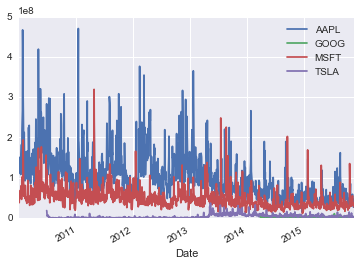

In [25]:
volume.plot(x=volume.index)

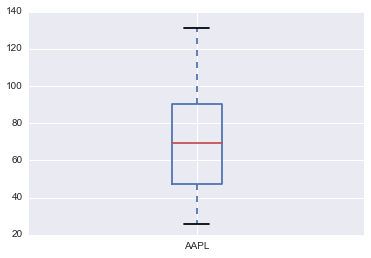

In [34]:
price.AAPL.plot.box()

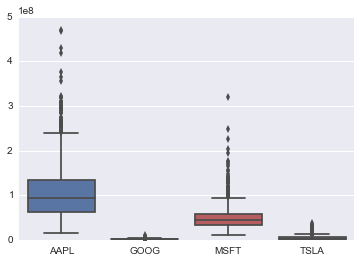

In [35]:
sns.boxplot(volume)